In [3]:
import matplotlib.pyplot as plt
import numpy as np
import re

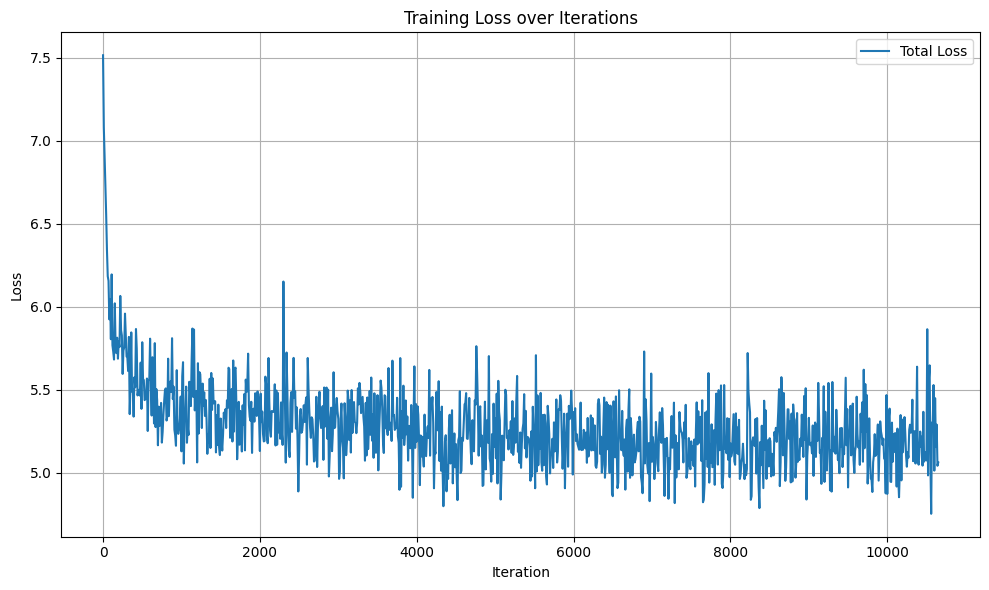

In [5]:
log_file = 'train_3.log'

# Хранилища для данных
iterations, loss, loss_ar, loss_cfm = [], [], [], []

# Регулярное выражение для извлечения данных
pattern = re.compile(
    r"Iteration (\d+), Loss: ([\d.]+), Loss AR: ([\d.]+), Loss CFM: ([\d.]+)"
)

# Чтение и парсинг
with open(log_file, 'r') as f:
    for line in f:
        match = pattern.search(line)
        if match:
            iter_num = int(match.group(1))
            iterations.append(iter_num)
            loss.append(float(match.group(2)))
            loss_ar.append(float(match.group(3)))
            loss_cfm.append(float(match.group(4)))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(iterations, loss, label='Total Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


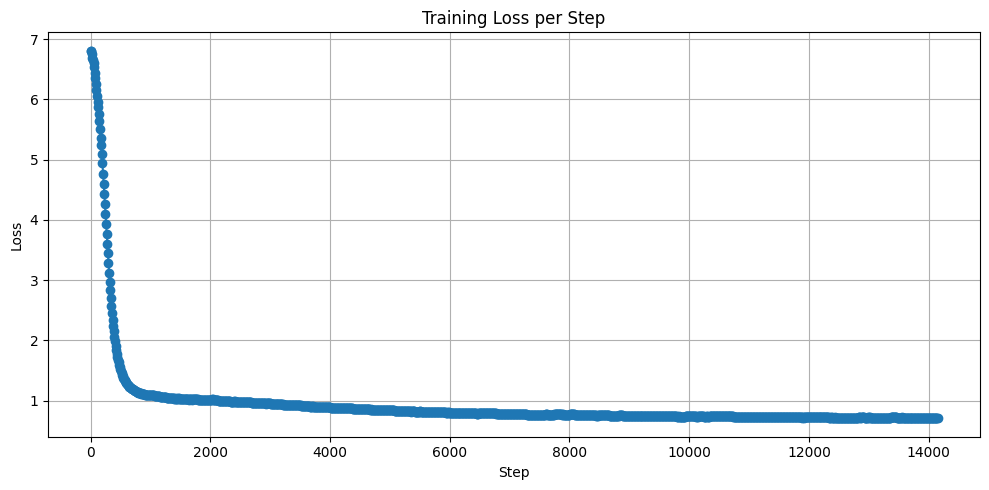

In [6]:
import re
import matplotlib.pyplot as plt

# Path to your log file
log_path = "train_5.log"

# Lists to store steps and losses
steps = []
losses = []

# Regex to extract step and loss
pattern = re.compile(r"step (\d+), loss: ([\d.]+)")

# Parse log file
with open(log_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            step = int(match.group(1))
            loss = float(match.group(2))
            steps.append(step)
            losses.append(loss)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps, losses, marker='o')
plt.title("Training Loss per Step")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


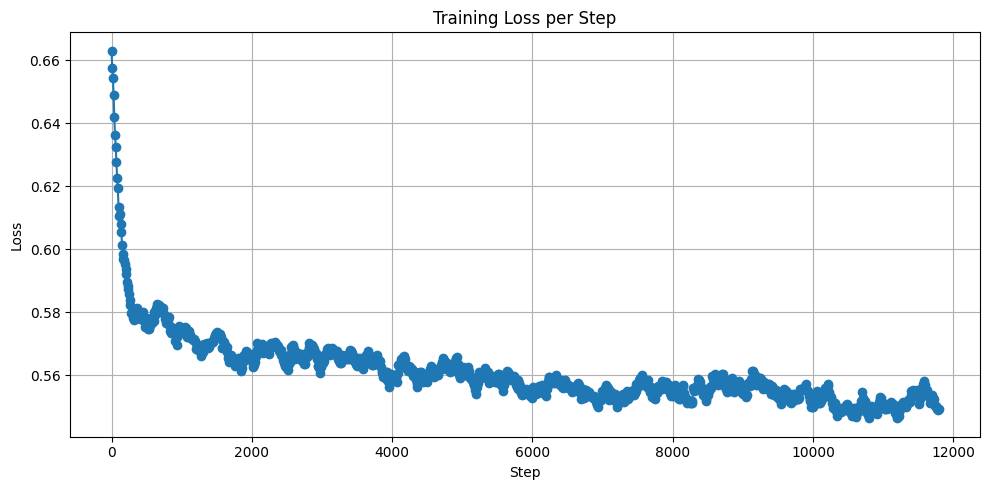

In [7]:
import re
import matplotlib.pyplot as plt

# Path to your log file
log_path = "train_7.log"


# Lists to store steps and losses
steps = []
losses = []

# Regex to extract step and loss
pattern = re.compile(r"step (\d+), loss: ([\d.]+)")

# Parse log file
with open(log_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            step = int(match.group(1))
            loss = float(match.group(2))
            steps.append(step)
            losses.append(loss)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps, losses, marker='o')
plt.title("Training Loss per Step")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


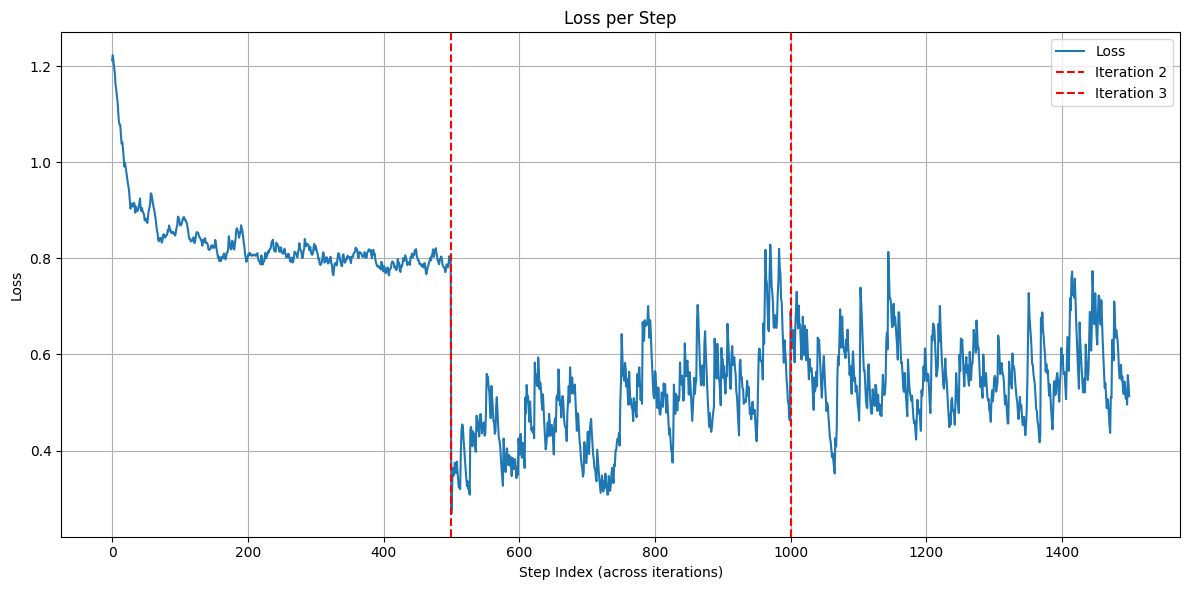

In [1]:
import re
import matplotlib.pyplot as plt
from datetime import datetime

# === Load and parse logs ===
log_path = "distill.log"  # Update with your log path
with open(log_path, "r") as f:
    lines = f.readlines()

# === Regular expressions ===
loss_pattern = re.compile(r"Iteration (\d+), Epoch (\d+), Step (\d+), Loss: ([\d.]+)")
timestamp_pattern = re.compile(r"^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d+")

steps = []
losses = []
iterations = []
timestamps = []

# === Parse each line ===
for line in lines:
    match = loss_pattern.search(line)
    if match:
        iteration = int(match.group(1))
        epoch = int(match.group(2))
        step = int(match.group(3))
        loss = float(match.group(4))

        # Extract timestamp
        ts_match = timestamp_pattern.search(line)
        if ts_match:
            ts = datetime.strptime(ts_match.group(), "%Y-%m-%d %H:%M:%S,%f")
        else:
            ts = None

        steps.append(step)
        losses.append(loss)
        iterations.append(iteration)
        timestamps.append(ts)

# === Detect where each new iteration starts ===
iteration_changes = []
for i in range(1, len(iterations)):
    if iterations[i] != iterations[i-1]:
        iteration_changes.append(i)

# === Plot ===
plt.figure(figsize=(12, 6))
plt.plot(losses, label="Loss")
for idx in iteration_changes:
    plt.axvline(x=idx, color='red', linestyle='--', label=f'Iteration {iterations[idx]}')

plt.title("Loss per Step")
plt.xlabel("Step Index (across iterations)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
